In [1]:
import sys

import matplotlib.pyplot as plt
import MDAnalysis as mda
import numpy as np
from MDAnalysis.analysis import rms
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA

In [ ]:
from collections.abc import Sequence
from typing import Any
from warnings import warn

import seaborn as sns
from matplotlib import ticker
from matplotlib.axes import Axes


def auto_style(
    rc_mplstyle=None,
    fname_mplstyle=None,
    palette_snsstyle=None,
) -> None:
    plt.style.use(r"./GraphPadPrism.mplstyle")
    sns.set_palette("bright")

    if palette_snsstyle is not None:
        sns.set_palette(palette_snsstyle)
    if fname_mplstyle is not None:
        plt.style.use(fname_mplstyle)
    if rc_mplstyle is not None:
        plt.style.use(rc_mplstyle)


def auto_ticks(
    ax,
    *,
    x_lim=None,
    y_lim=None,
) -> None:
    if x_lim is not None:
        ax.set_xlim(x_lim)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=6, min_n_ticks=3))
    x_tick_num = len(ax.get_xticks())
    if x_tick_num >= 6:
        ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    elif x_tick_num >= 5:
        ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(4))
    else:
        ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(5))

    if (ax.get_xticks()[0] != ax.get_xlim()[0]) or (ax.get_xticks()[-1] != ax.get_xlim()[-1]):
        ax.set_xlim(ax.get_xticks()[0], ax.get_xticks()[-1])

    if y_lim is not None:
        ax.set_ylim(y_lim)
    ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=6, min_n_ticks=3))
    y_tick_num = len(ax.get_yticks())
    if y_tick_num >= 6:
        ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    elif y_tick_num >= 5:
        ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(4))
    else:
        ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(5))
    if (ax.get_yticks()[0] != ax.get_ylim()[0]) or (ax.get_yticks()[-1] != ax.get_ylim()[-1]):
        ax.set_ylim(ax.get_yticks()[0], ax.get_yticks()[-1])


auto_style(
    rc_mplstyle={
        "axes.labelweight": "bold",
    }
    # palette_snsstyle=[
    #     "#BCE4F9",
    #     "#7BD3F2",
    #     "#F0AECB",
    #     "#E88791",
    #     "#C4DDB1",
    #     "#97D9A8",
    #     "#CCCCE6",
    #     "#9D9DCF",
    #     "#8FB0DD",
    #     "#F0CEA4",
    #     "#F8A450",
    # ],
)

In [ ]:
def plot_rmsd(
    topology_files,
    trajectory_files,
    selections="protein",
    legends=None,
    **kwargs,
) -> None:
    if isinstance(topology_files, str) and isinstance(trajectory_files, str):
        topology_files = [topology_files]
        trajectory_files = [trajectory_files]

    if len(topology_files) != len(trajectory_files):
        raise ValueError("The number of topology and trajectory files must be the same.")

    if isinstance(selections, str):
        selections = [selections] * len(topology_files)
    elif len(selections) != len(topology_files):
        raise ValueError(
            "The number of selections must be the same as the number of topology files."
        )

    if legends is not None:
        if isinstance(legends, str):
            legends = [legends] * len(topology_files)
        if len(legends) != len(topology_files):
            raise ValueError(
                "The number of legends must be the same as the number of topology files."
            )
    else:
        legends = topology_files

    fig, ax = plt.subplots()
    for topology_file, trajectory_file, selection, legend in zip(
        topology_files, trajectory_files, selections, legends, strict=False
    ):
        u = mda.Universe(topology_file, trajectory_file)
        protein = u.select_atoms(selection)
        R = rms.RMSD(
            protein,
            select="backbone" if selection == "protein" else "all",
        ).run(**kwargs)
        times_in_ns = R.times / 1000
        ax.plot(times_in_ns, R.results.rmsd[:, 2], linewidth=1)

    auto_ticks(ax, x_lim=(0, 200))

    ax.legend(legends, bbox_to_anchor=(1.6, 1), loc="upper right")

    ax.set_xlabel("Time (ns)")
    ax.set_ylabel("RMSD (Å)")
    plt.show()


def plot_rmsf(
    topology_files,
    trajectory_files,
    selections="protein and name CA",
    legends=None,
    **kwargs,
) -> None:
    if isinstance(topology_files, str) and isinstance(trajectory_files, str):
        topology_files = [topology_files]
        trajectory_files = [trajectory_files]

    if len(topology_files) != len(trajectory_files):
        raise ValueError("The number of topology and trajectory files must be the same.")

    if isinstance(selections, str):
        selections = [selections] * len(topology_files)
    elif len(selections) != len(topology_files):
        raise ValueError(
            "The number of selections must be the same as the number of topology files."
        )

    if legends is not None:
        if isinstance(legends, str):
            legends = [legends] * len(topology_files)
        if len(legends) != len(topology_files):
            raise ValueError(
                "The number of legends must be the same as the number of topology files."
            )
    else:
        legends = topology_files

    fig, ax = plt.subplots()
    for topology_file, trajectory_file, selection, legend in zip(
        topology_files, trajectory_files, selections, legends, strict=False
    ):
        u = mda.Universe(topology_file, trajectory_file)
        protein = u.select_atoms(selection)
        R = rms.RMSF(protein).run(**kwargs)
        ax.plot(protein.residues.resids, R.results.rmsf, linewidth=1.5)

    auto_ticks(ax, x_lim=(0, 320))

    ax.legend(legends, bbox_to_anchor=(1.4, 1), loc="upper right")

    ax.set_xlabel("Residue ID")
    ax.set_ylabel("RMSF (Å)")
    plt.show()

In [ ]:
# topology_file_turboid = "/home/fridrichmethod/data/research/reika/TurboID_bioAMP_seed_82603_sample_2/charmm-gui-5236501518/gromacs/step5_1_complex_fit.pdb"
# trajectory_file_turboid = "/home/fridrichmethod/data/research/reika/TurboID_bioAMP_seed_82603_sample_2/charmm-gui-5236501518/gromacs/step5_1_complex_fit.xtc"
topology_file_bira = "BirA_bioAMP_1/step5_1_complex_fit.pdb"
trajectory_file_bira = "BirA_bioAMP_1/step5_1_complex_fit.xtc"
topology_file_bira_apo = "BirA_1/step5_1_complex_fit.pdb"
trajectory_file_bira_apo = "BirA_1/step5_1_complex_fit.xtc"
# topology_file_bioid = "/home/fridrichmethod/data/research/reika/BioID_bioAMP_seed_82603_sample_2/charmm-gui-5239036078/gromacs/step5_1_complex_fit.pdb"
# trajectory_file_bioid = "/home/fridrichmethod/data/research/reika/BioID_bioAMP_seed_82603_sample_2/charmm-gui-5239036078/gromacs/step5_1_complex_fit.xtc"
# topology_file_cpt = "/home/fridrichmethod/data/research/reika/cpT_bioAMP_seed_82603_sample_3/charmm-gui-5245225980/gromacs/step5_1_complex_fit.pdb"
# trajectory_file_cpt = "/home/fridrichmethod/data/research/reika/cpT_bioAMP_seed_82603_sample_3/charmm-gui-5245225980/gromacs/step5_1_complex_fit.xtc"
# output_filename_turboid = (
#     "/home/fridrichmethod/data/research/reika/step5_1_complex_fit_rmsf_turboid.pdb"
# )
output_filename_bira = "BirA_bioAMP_1/step5_1_complex_fit_rmsf_bira.pdb"
output_filename_bira_apo = "BirA_1/step5_1_complex_fit_rmsf_bira_apo.pdb"
# output_filename_bioid = (
#     "/home/fridrichmethod/data/research/reika/step5_1_complex_fit_rmsf_bioid.pdb"
# )
# output_filename_cpt = (
#     "/home/fridrichmethod/data/research/reika/step5_1_complex_fit_rmsf_cpt.pdb"
# )


def add_rmsf_to_pdb(
    topology_file: str,
    trajectory_file: str,
    output_filename: str,
    **kwargs: Any,
) -> None:
    """Calculate RMSF for all protein atoms and write to a PDB file with B-factors."""
    u = mda.Universe(topology_file, trajectory_file)
    protein_atoms = u.select_atoms("all")
    R = rms.RMSF(protein_atoms).run(
        **kwargs,  # Pass additional keyword arguments to RMSF.run
    )

    # Load the PDB file for writing B-factors
    u_pdb = mda.Universe(topology_file)
    protein_atoms_pdb = u_pdb.select_atoms("all")

    # Set B-factors to scaled RMSF values
    protein_atoms_pdb.tempfactors = R.results.rmsf

    # Write the modified PDB file
    u_pdb.atoms.write(output_filename)


add_rmsf_to_pdb(
    topology_file=topology_file_bira,
    trajectory_file=trajectory_file_bira,
    output_filename=output_filename_bira,
    start=200,
    stop=2000,
    step=1,
)
add_rmsf_to_pdb(
    topology_file=topology_file_bira_apo,
    trajectory_file=trajectory_file_bira_apo,
    output_filename=output_filename_bira_apo,
    start=200,
    stop=2000,
    step=1,
)
# add_rmsf_to_pdb(
#     topology_file=topology_file_bioid,
#     trajectory_file=trajectory_file_bioid,
#     output_filename=output_filename_bioid,
#     start=200,
#     stop=2000,
#     step=1,
# )
# add_rmsf_to_pdb(
#     topology_file=topology_file_cpt,
#     trajectory_file=trajectory_file_cpt,
#     output_filename=output_filename_cpt,
#     start=200,
#     stop=2000,
#     step=1,
# )

/home/fridrichmethod/miniconda3/envs/md/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"
/home/fridrichmethod/miniconda3/envs/md/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1201: UserWarning: Found missing chainIDs. Corresponding atoms will use value of 'X'
  warnings.warn("Found missing chainIDs."


```bash
spectrum b, blue_white_red, minimum=0, maximum=3
```

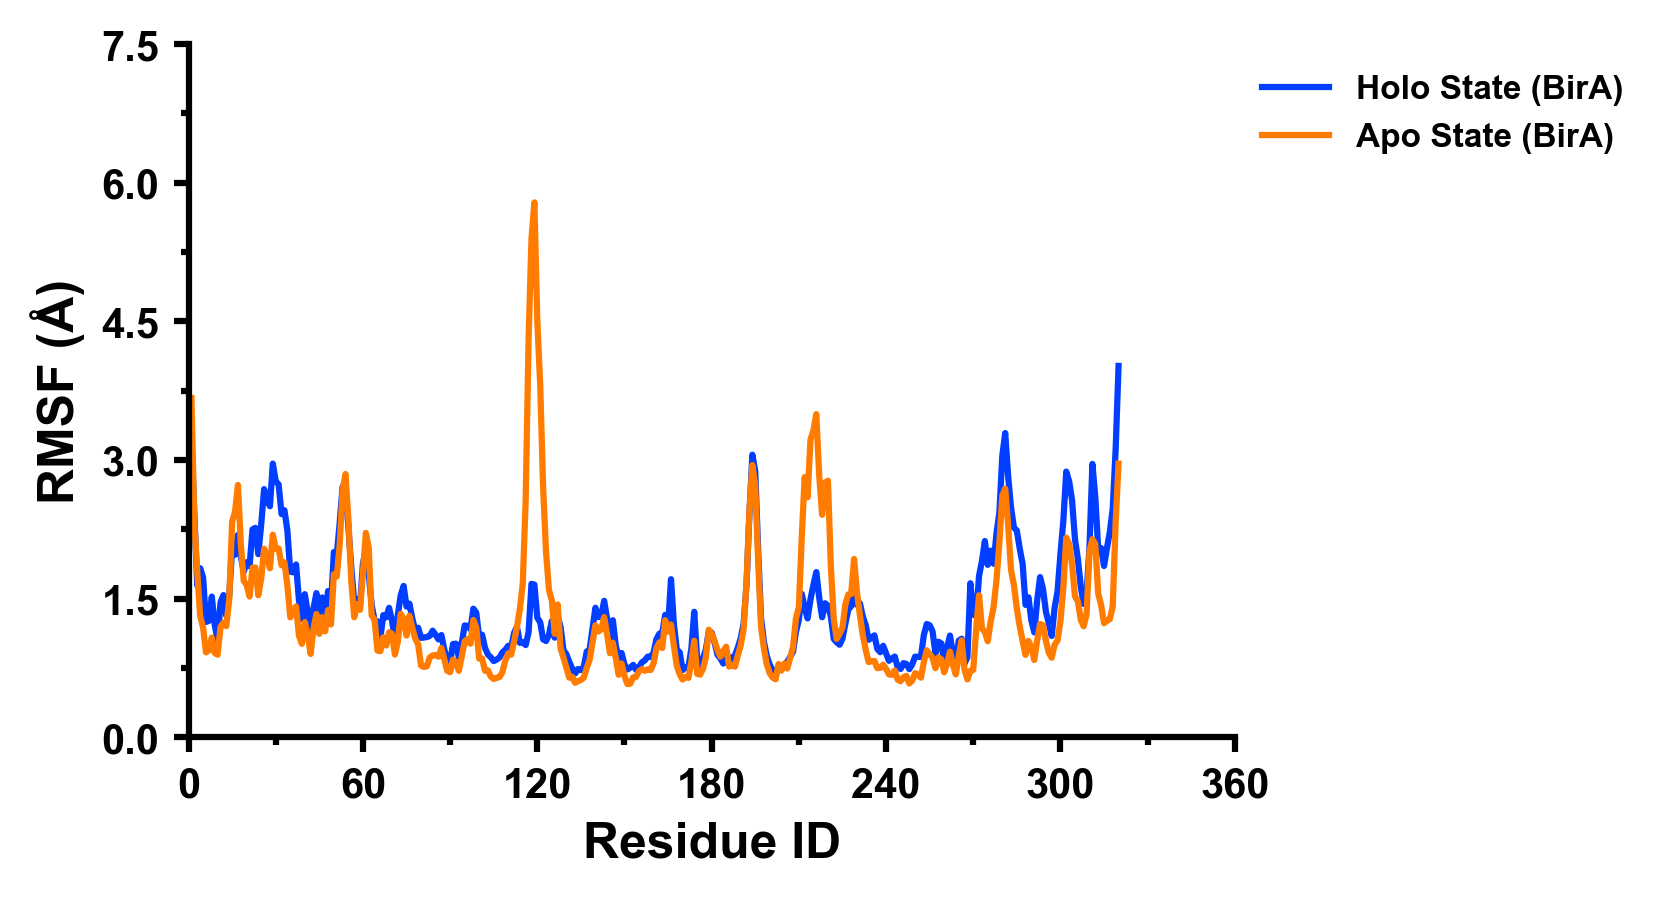

In [5]:
plot_rmsf(
    [topology_file_bira, topology_file_bira_apo],
    [
        trajectory_file_bira,
        trajectory_file_bira_apo,
    ],
    legends=[
        r"Holo State (BirA)",
        r"Apo State (BirA)",
    ],
    start=200,
    stop=2000,
    step=1,
)

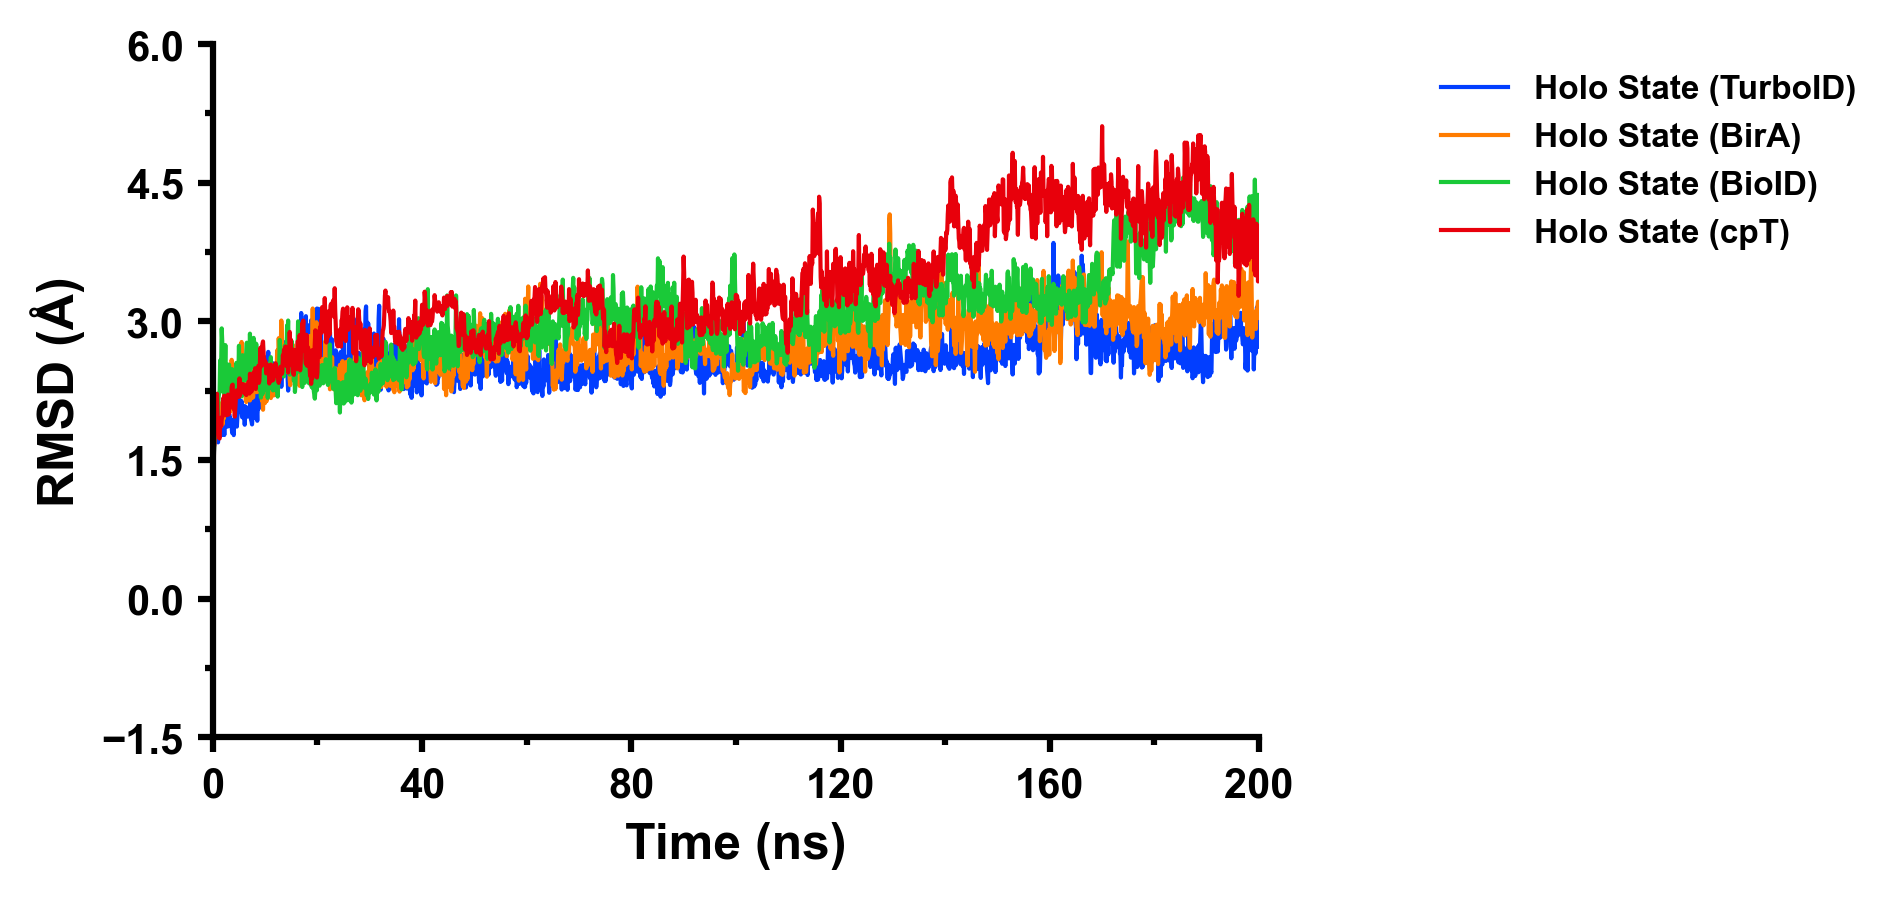

In [8]:
plot_rmsd(
    [
        topology_file_turboid,
        topology_file_bira,
        topology_file_bioid,
        topology_file_cpt,
    ],
    [
        trajectory_file_turboid,
        trajectory_file_bira,
        trajectory_file_bioid,
        trajectory_file_cpt,
    ],
    selections="all",
    legends=[
        r"Holo State (TurboID)",
        r"Holo State (BirA)",
        r"Holo State (BioID)",
        r"Holo State (cpT)",
    ],
    start=0,
    stop=2000,
    step=1,
)

In [ ]:
def plot_hbond(
    topology_files,
    trajectory_files,
    selections1="protein",
    selections2="resname UNK",
    legends=None,
    **kwargs,
) -> None:
    # Load the protein and ligand structures
    u = mda.Universe(topology_files, trajectory_files)

    # Initialize a HydrogenBondAnalysis object
    H = HBA(u, between=[selections1, selections2]).run(**kwargs)

    # Plot the number of hydrogen bonds over time
    fig, ax = plt.subplots()
    ax.plot(H.times / 1000, H.count_by_time, linewidth=1)

    auto_ticks(ax)

    # ax.legend(legends, bbox_to_anchor=(1.33, 1), loc="upper right")

    ax.set_xlabel("Time (ns)")
    ax.set_ylabel("Number of Hydrogen Bonds")
    plt.show()